In [1]:
from google.colab import files
uploaded = files.upload()


Saving Ques1.m4a to Ques1.m4a
Saving Ques2.m4a to Ques2.m4a


In [2]:
!pip install librosa soundfile


In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load audio
signal1, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)

print("Sampling rate:", sr)
print("Signal length:", len(signal1))


/tmp/ipython-input-362657651.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal1, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sampling rate: 16000
Signal length: 106255


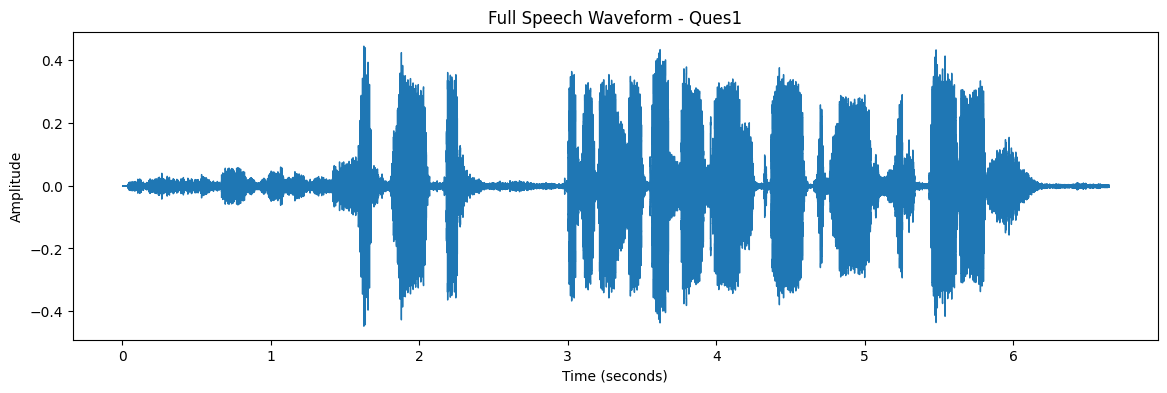

In [5]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(signal1, sr=sr)
plt.title("Full Speech Waveform - Ques1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [6]:

frame_length = int(0.02 * sr)
hop_length   = int(0.01 * sr)

energy = librosa.feature.rms(
    y=signal1,
    frame_length=frame_length,
    hop_length=hop_length
)[0]


threshold = np.mean(energy) * 0.5
speech_frames = energy > threshold


In [7]:
segments = []
start = None

for i, val in enumerate(speech_frames):
    if val and start is None:
        start = i
    elif not val and start is not None:
        end = i
        segments.append((start, end))
        start = None

# Convert frame index to sample index
phoneme_segments = []
for s, e in segments:
    start_sample = s * hop_length
    end_sample   = e * hop_length
    phoneme_segments.append(signal1[start_sample:end_sample])

print("Number of phoneme segments:", len(phoneme_segments))


Number of phoneme segments: 17


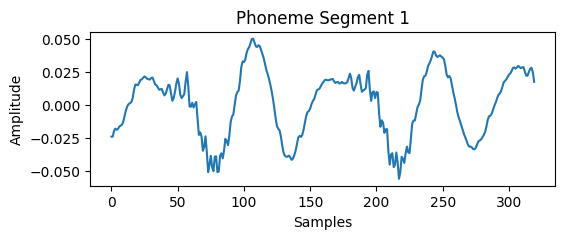

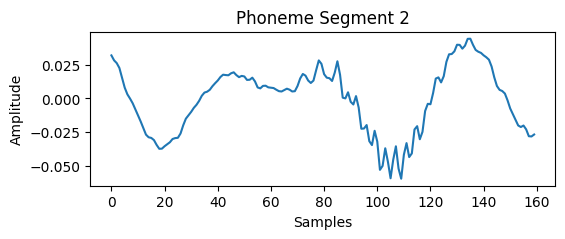

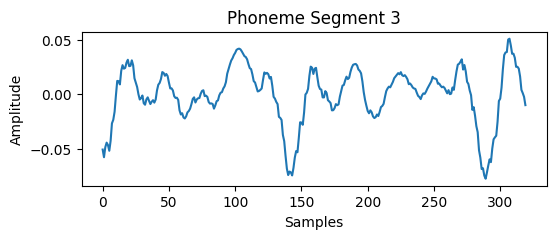

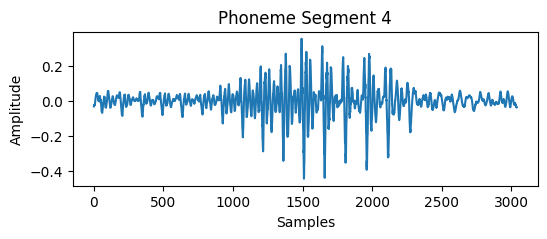

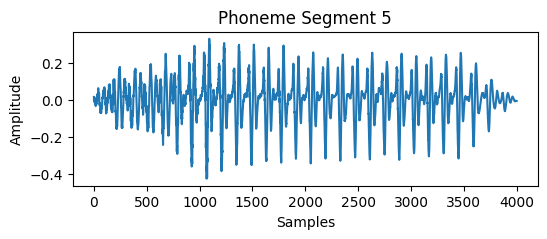

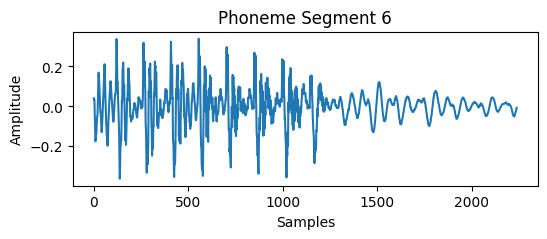

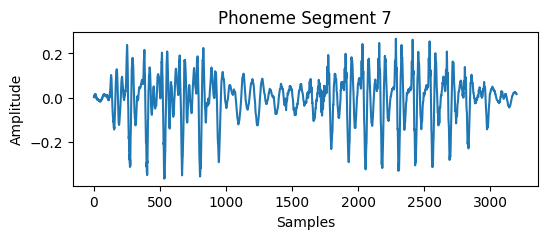

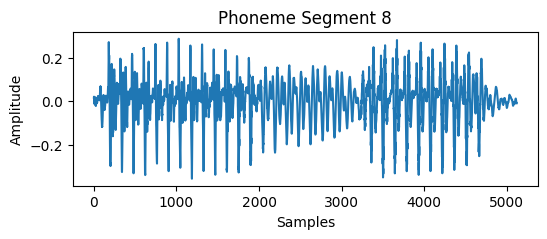

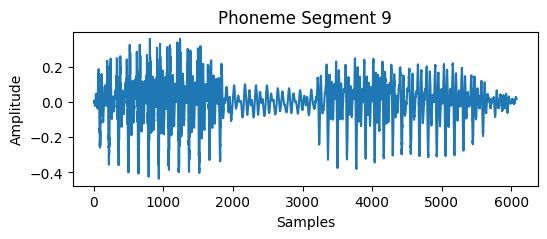

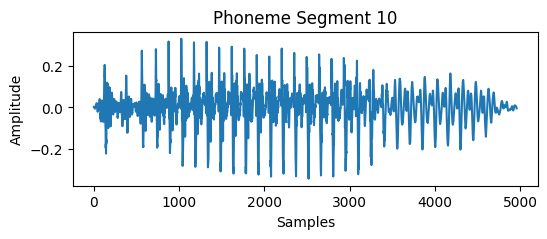

In [8]:
for i, seg in enumerate(phoneme_segments[:10]):  # show first 10
    plt.figure(figsize=(6,2))
    plt.plot(seg)
    plt.title(f"Phoneme Segment {i+1}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()


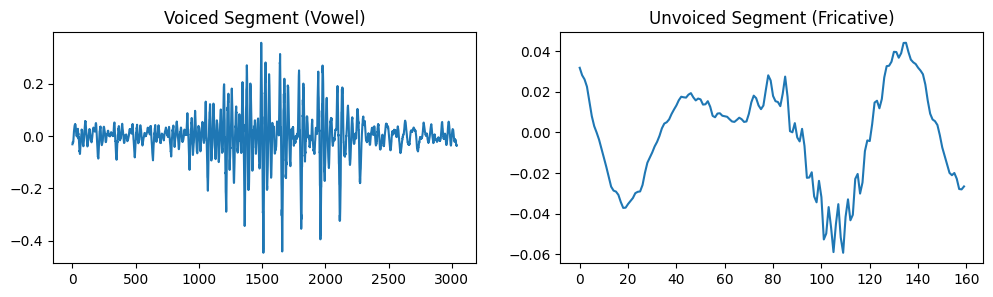

In [9]:
voiced = phoneme_segments[3]      # example vowel
unvoiced = phoneme_segments[1]    # example fricative

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(voiced)
plt.title("Voiced Segment (Vowel)")

plt.subplot(1,2,2)
plt.plot(unvoiced)
plt.title("Unvoiced Segment (Fricative)")
plt.show()


/tmp/ipython-input-3901667391.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal2, sr = librosa.load("Ques2.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


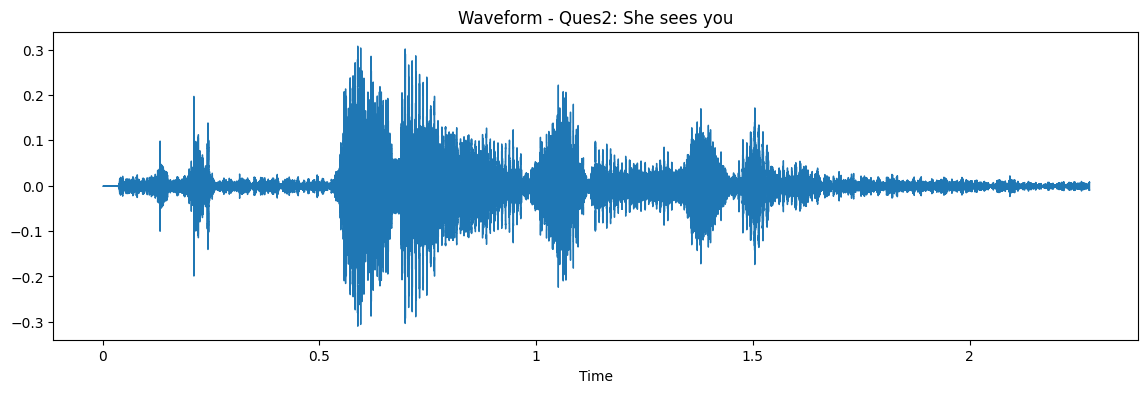

In [10]:
signal2, sr = librosa.load("Ques2.m4a", sr=16000, mono=True)

plt.figure(figsize=(14,4))
librosa.display.waveshow(signal2, sr=sr)
plt.title("Waveform - Ques2: She sees you")
plt.show()


In [11]:
energy2 = librosa.feature.rms(
    y=signal2,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

speech_frames2 = energy2 > (np.mean(energy2) * 0.5)

segments2 = []
start = None
for i, val in enumerate(speech_frames2):
    if val and start is None:
        start = i
    elif not val and start is not None:
        end = i
        segments2.append((start, end))
        start = None

phoneme_segments2 = []
for s, e in segments2:
    phoneme_segments2.append(signal2[s*hop_length:e*hop_length])

print("Segments extracted:", len(phoneme_segments2))


Segments extracted: 5


In [12]:
fricative_s = phoneme_segments2[1]   # /s/ or /ʃ/
approximant_j = phoneme_segments2[3] # /j/


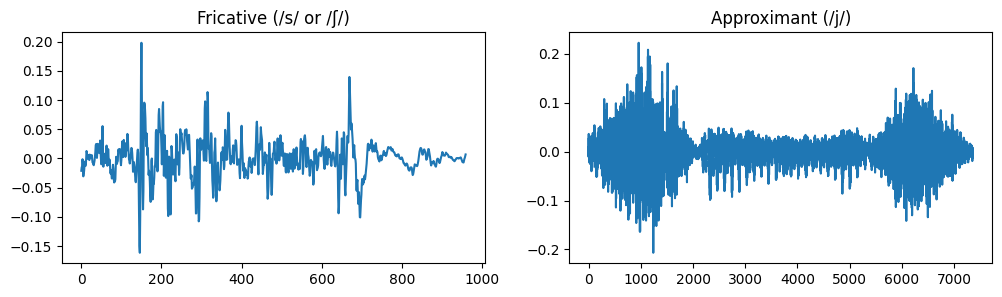

In [13]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.plot(fricative_s)
plt.title("Fricative (/s/ or /ʃ/)")

plt.subplot(1,2,2)
plt.plot(approximant_j)
plt.title("Approximant (/j/)")

plt.show()
